In [32]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.svm import LinearSVC, SVC

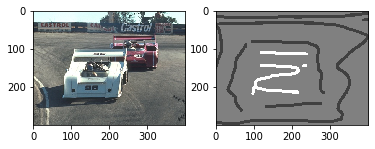

In [33]:
image = '21077.bmp'
img = cv2.imread('../Datasets/SegmentacionImagenes/images/'+image)
mask = cv2.imread('../Datasets/SegmentacionImagenes/bordes_mr/'+image)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(mask,cmap='gray')
plt.show()

In [34]:
print(img.shape)
print(mask.shape)
nrows,ncols,_ = img.shape
# Vectorizar imágenes
Xmask = np.reshape(mask,(nrows*ncols,3))
Ximg = np.reshape(img,(nrows*ncols,3))

(300, 400, 3)
(300, 400, 3)


In [35]:
Xmask = Xmask[:,0]
print(np.unique(mask,return_counts=True))

(array([ 64, 128, 255], dtype=uint8), array([ 52917, 294846,  12237], dtype=int64))


In [36]:
# Pixeles del objeto y del fondo
Xobj= Ximg[ Xmask==255 ]
Xbck= Ximg[ Xmask==64 ]

print('Xobj',Xobj.shape)
print('Xbck',Xbck.shape)

Xobj (4079, 3)
Xbck (17639, 3)


In [37]:
Yobj = np.ones( (Xobj.shape[0]) )*255
Ybck = np.zeros( (Xbck.shape[0]) )
print('Yobj',len(Yobj),Yobj)
print('Ybck',len(Ybck),Ybck)

Yobj 4079 [255. 255. 255. ... 255. 255. 255.]
Ybck 17639 [0. 0. 0. ... 0. 0. 0.]


In [38]:
# Datos de entrenamiento
X = np.concatenate((Xobj,Xbck),axis=0)
Y = np.concatenate((Yobj,Ybck),axis=0)
print('X',X.shape)
print('Y',len(Y))

X (21718, 3)
Y 21718


In [39]:
# Modelo de SVM
model = LinearSVC()
model.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [40]:
yres = model.predict(Ximg)
imgres = np.reshape(yres,(nrows,ncols))
print(imgres.shape)

(300, 400)


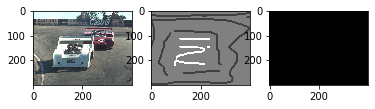

In [41]:
plt.figure()
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(mask,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(imgres,cmap='gray')
plt.show()

(300, 400)


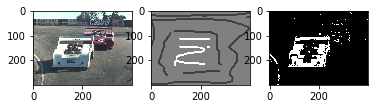

In [42]:
# Modelo con SVC

model = SVC()
model.fit(X,Y)
yres = model.predict(Ximg)
imgres = np.reshape(yres,(nrows,ncols))
print(imgres.shape)
plt.figure()
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(mask,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(imgres,cmap='gray')
plt.show()